In [24]:
import numpy as np
from tensorflow.keras import (
    datasets, 
    utils,
    layers,
    models,
    optimizers
)
import matplotlib.pyplot as plt

In [25]:
NUM_CLASSES = 10

# CNN A little of THEORY

An example of Kernel(filter) of size 3 × 3 × 1 (gray), which has being passed over a input image 5 × 5 × 1  (blue), with padding = "same" and strides = 1
The output is generate the 5 × 5 × 1 (green)

Note how the padding = "same" pads the input data with zeros(transparent) so that the output size from the layer is exactly the same as the input size when strides = 1.

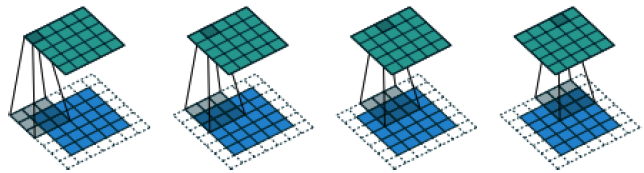

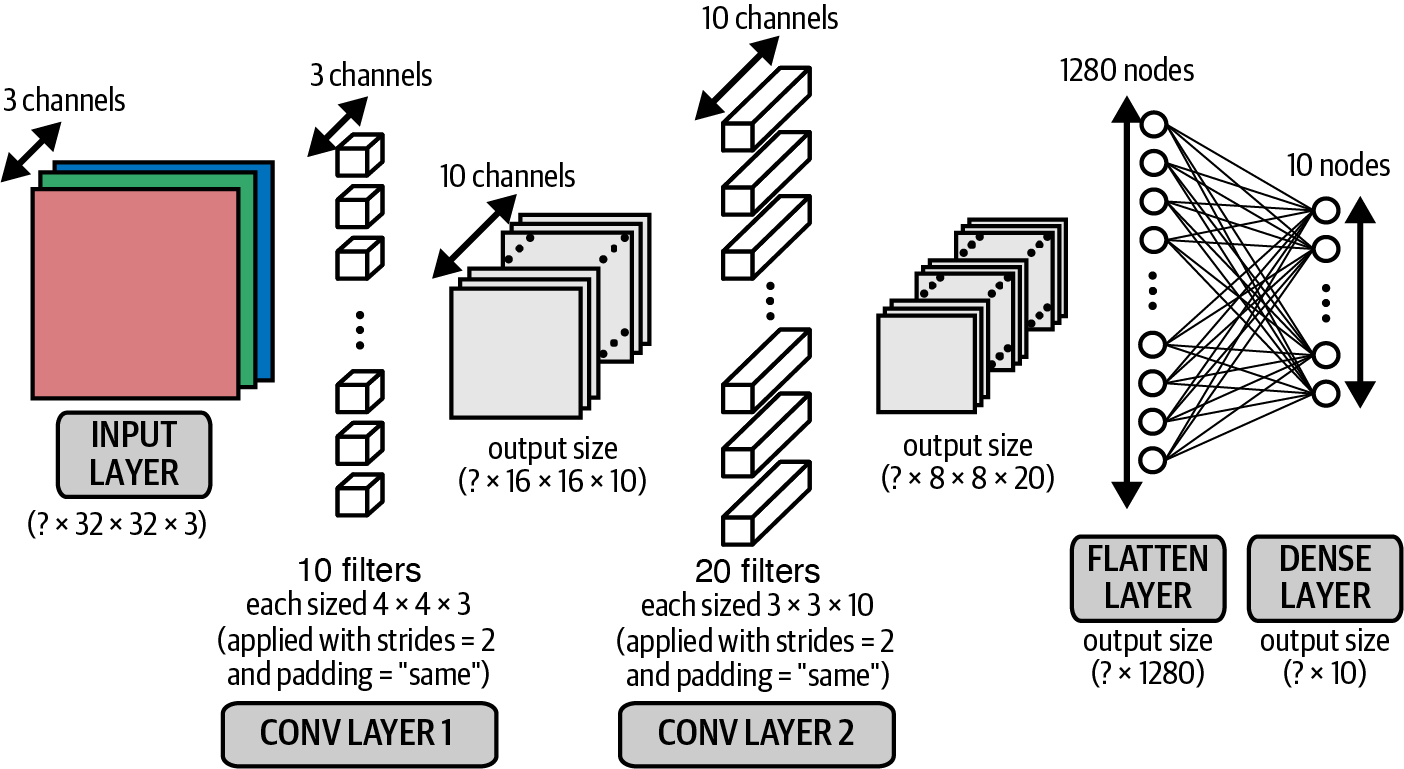

```python
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
filters = 10
, kernel_size = (4,4)
, strides = 2
, padding = 'same'
)(input_layer)
conv_layer_2 = layers.Conv2D(
filters = 20
, kernel_size = (3,3)
, strides = 2
, padding = 'same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation = 'softmax')
(flatten_layer)
model = models.Model(input_layer, output_layer)
```
When applying 10 filters of size 4x4x3 to an image of size 32x32x3 with a stride of 2 and padding set to 'same', we get an output tensor with dimensions 16x16x10 because:

**Filters (Convolutional Kernels):**
- filters=10: Defines the number of output channels. Each filter extracts a specific feature from the input image. kernel_size(filter_size)=(4,4): Defines the size of the area that the filter will scan across the image.The filter depth (3) corresponds to the number of input channels (RGB), as the image has 3 channels (red, green, blue).

**Strides=2:**
- Defines how far the filter moves across the image after each application. A stride of 2 means that the filter moves by 2 pixels at a time, both horizontally and vertically.

**Padding='same':** 
- Ensures that the spatial dimensions of the output tensor are preserved by adding extra pixels (usually zeros) around the borders of the input image. With padding set to 'same', the output dimensions are computed as:
    - Output Dimension=⌈Input DimensionStride⌉
    - Output Dimension=⌈StrideInput Dimension​⌉
      Where ⌈⋅⌉⌈⋅⌉ means rounding up to the nearest integer.

**Output Dimension Calculation**

Let’s break down how the output tensor dimensions are calculated:
    - Input image: 32 (height) x 32 (width) x 3 (channels).
    - Padding='same':
        - Ensures that the image’s dimensions are preserved after the convolution, if the stride equals 1. However, with a stride greater than 1, the dimensions decrease.
        - For a stride of 2:
        - $$ \text{Output Height} = \left\lceil \frac{32}{2} \right\rceil = 16 $$
        - Number of Filters: Since 10 filters are used, the output tensor will have 10 channels, one for each filter.
    - Thus, the final output tensor dimensions are:
        - 16×16×10

**Final Explanation:**
    The spatial dimensions (16x16) are reduced due to the stride of 2, which cuts each dimension in half.
    The depth (10) is determined by the number of filters applied to the image.

**Conclusion**
The parameter filters=10 determines the number of different features that will be extracted from the input image, while the parameters kernel_size=(4,4), strides=2, and padding='same' control how these features are extracted and how the output dimensions change. The result is a tensor of size 16x16x10, where each of the 10 feature maps represents different aspects of the original image.

# DOWNLOAD CIFAR-10

In [26]:
# Load CIFAR-10 Dataset
# x_train and x_test are numpy arrays of shape [50000,32,32,3] and [10000,32,32,3]
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# PREPARE DATA

In [27]:
# Scale each image so that the pixel channel values lie between 0 and 1
# instead of passing pixel values from 0–255 into the input layer, we usually scale these values to between –1 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels-the new shapes [50000,10]
y_train= utils.to_categorical(y_train,NUM_CLASSES)
y_test= utils.to_categorical(y_test, NUM_CLASSES)



# BUILD CNN MODEL

In [28]:
# Using a BAD architectire (batch normalization, activation, then dropout)

input_layer =layers.Input((32,32,3))

# P = (3x3x3)x32 +32 = 896
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',    
)(input_layer)
# P = 2 learneble params (γ и β) or 32 channles = 64 (2 for each channel) + 64 unlearning params (sliding avg and standard deviation).
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# P = (3x3x32+1)*32 = 9248
# T = 16 x 16 x32 = 
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=2,
    padding='same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# P = (3x3x32 +1) x 64 = 18496
# T = 16x 16 x 64
x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# P=(3x3x64+1) x 64 = 36928
# T = 8 x 8 x 64 = 4096
x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    padding='same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

# 4096 units as output of flatteing operation becuase the final Tensor shape is 8x8x64
x = layers.Flatten()(x)

# P = (4096x128+128) = 524416
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(input_layer,output_layer)

In [29]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

**EXPLANATIONS**
- The number of parameters (or weights) in the layer is (4 × 4 × 3 + 1) × 10 = 490
- In the second convolutional layer, we choose the filters to be 3 × 3 and they now have depth 10, to match the number of channels in the previous layer.
- Since there are 20 filters in this layer, this gives a total number of parameters (weights) of (3 × 3 × 10 + 1) × 20 = 1,820

In this model we stacked 4 Conv2D layers, each followed by a BatchNormalization and a LeakyReLU layers. After flattening the resulting tensor, we pass the data through a Dense layer of size 128, again ollowed by a BatchNormalization and a LeakyReLU layer. Then we add a Dropout layer for regularization, and the as a last layer our network is concluded with an output Dense layer of size 10, and this is because we have 10 classes for our predicions

# COMPILE MODEL

In [30]:
opt = optimizers.Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# TRAINING MODEL

In [31]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True
)

Epoch 1/10


I0000 00:00:1726751048.130066    5337 service.cc:145] XLA service 0x7fd2b80163d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726751048.130225    5337 service.cc:153]   StreamExecutor device (0): NVIDIA T1200 Laptop GPU, Compute Capability 7.5
2024-09-20 00:04:08.212740: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-20 00:04:08.442837: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  40/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1948 - loss: 2.7623

I0000 00:00:1726751051.990908    5337 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.3796 - loss: 1.8251
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5817 - loss: 1.1952
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6514 - loss: 0.9973
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6849 - loss: 0.9036
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7072 - loss: 0.8393
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7259 - loss: 0.7805
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7433 - loss: 0.7369
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7549 - loss: 0.7070
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7665 - loss: 0.6623
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7766 - loss: 0.6378


# EVALUATE MODEL

In [32]:
model.evaluate(x_test,y_test,batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7374 - loss: 0.7693


[0.7755530476570129, 0.7347000241279602]

**SUMMARY**

Model is achieving 73% accuracy,

# TEST MODEL

In [33]:
CLASSES = np.array(
    [
        'airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck'
    ]
)

In [34]:
# preds is an array of shape [10000, 10]—i.e., a vector of 10 class probabilities for each observation.
# We convert this array of probabilities back into a single prediction using numpy’s argmax function. 
# Here, axis =–1 tells the function to collapse the array over the last dimension (the classes dimension), 
# so that the shape of preds_single is then [10000, 1].
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


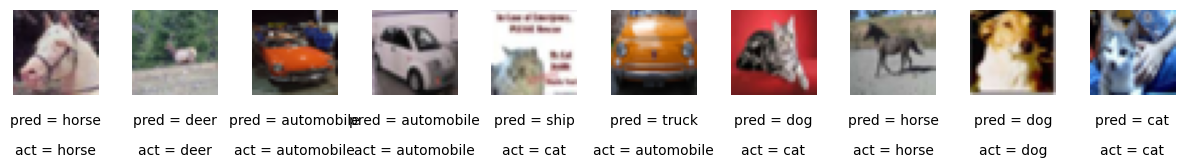

In [35]:
n_to_show=10
indices= np.random.choice(range(len(x_test)), n_to_show)

fig= plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

**SUMMARY**

As we can see our CNN architecture model demonstrates good enough accuracy results both on the training set and test